In [161]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim

In [56]:
crimes = pd.read_csv('csvs/Crimes_16.csv')
schools = pd.read_csv('csvs/Schools_1617.csv')

In [94]:
crimes_upd = crimes.copy().drop(['Year', 'Block','ID','Case Number' ,'IUCR', 'Description','X Coordinate', 'Y Coordinate', 'Latitude', 'Longitude', 'Updated On', 'Beat', 'Ward', 'District'], axis = 1)
crimes_upd
#crimes

,Date,Primary Type,Location Description,Arrest,Domestic,Community Area,FBI Code,Location
0,05/03/2016 09:00:00 PM,NARCOTICS,SIDEWALK,True,False,26,18,"(41.880658176, -87.731212135)"
1,05/03/2016 09:35:00 PM,THEFT,APARTMENT,False,True,65,06,"(41.77414081, -87.726307093)"
2,05/03/2016 02:45:00 PM,ASSAULT,STREET,False,True,61,08A,"(41.811697721, -87.675214316)"
3,05/03/2016 06:42:00 PM,BATTERY,SIDEWALK,False,True,66,08B,"(41.778661058, -87.68227253)"
4,05/03/2016 03:00:00 PM,ROBBERY,SIDEWALK,False,False,69,03,"(41.766961034, -87.620152116)"
5,05/03/2016 10:02:00 PM,OTHER OFFENSE,STREET,True,False,27,26,"(41.882087429, -87.711041964)"
6,05/03/2016 03:30:00 PM,ASSAULT,SIDEWALK,False,False,26,08A,"(41.874865643, -87.720427367)"
7,05/03/2016 09:09:00 PM,THEFT,APARTMENT,True,False,40,06,"(41.780946398, -87.621995369)"
8,05/03/2016 09:42:00 PM,NARCOTICS,SIDEWALK,True,False,42,18,"(41.784917834, -87.613257846)"
9,05/03/2016 08:42:00 PM,OTHER OFFENSE,STREET,True,True,67,26,"(41.771681167, -87.661575794)"


In [111]:
def def_time(row):
    expression = re.search('(\d+:\d+:\d+) (\w+)', row[0])
    num = int(expression.group(1)[0:2])
    when = expression.group(2)
    if when == 'AM':
        if num == 12:
            return (int(num) - 12)
        else:
            return int(num)
    else:
        if num == 12:
            return int(num)
        else:
            return (int(num) + 12)

        
time = list(map(def_time, crimes_upd.itertuples(index = False)))

crimes_upd['Crime Time'] = time
crimes_upd

,Date,Primary Type,Location Description,Arrest,Domestic,Community Area,FBI Code,Location,Crime Time
0,05/03/2016 09:00:00 PM,NARCOTICS,SIDEWALK,True,False,26,18,"(41.880658176, -87.731212135)",21
1,05/03/2016 09:35:00 PM,THEFT,APARTMENT,False,True,65,06,"(41.77414081, -87.726307093)",21
2,05/03/2016 02:45:00 PM,ASSAULT,STREET,False,True,61,08A,"(41.811697721, -87.675214316)",14
3,05/03/2016 06:42:00 PM,BATTERY,SIDEWALK,False,True,66,08B,"(41.778661058, -87.68227253)",18
4,05/03/2016 03:00:00 PM,ROBBERY,SIDEWALK,False,False,69,03,"(41.766961034, -87.620152116)",15
5,05/03/2016 10:02:00 PM,OTHER OFFENSE,STREET,True,False,27,26,"(41.882087429, -87.711041964)",22
6,05/03/2016 03:30:00 PM,ASSAULT,SIDEWALK,False,False,26,08A,"(41.874865643, -87.720427367)",15
7,05/03/2016 09:09:00 PM,THEFT,APARTMENT,True,False,40,06,"(41.780946398, -87.621995369)",21
8,05/03/2016 09:42:00 PM,NARCOTICS,SIDEWALK,True,False,42,18,"(41.784917834, -87.613257846)",21
9,05/03/2016 08:42:00 PM,OTHER OFFENSE,STREET,True,True,67,26,"(41.771681167, -87.661575794)",20


In [102]:
district = pd.read_csv('csvs/CommAreas.csv')
district = district[['AREA_NUMBE', 'COMMUNITY']]
district.sort_values(['AREA_NUMBE'], ascending = True).reset_index(drop=True)

,AREA_NUMBE,COMMUNITY
0,1,ROGERS PARK
1,2,WEST RIDGE
2,3,UPTOWN
3,4,LINCOLN SQUARE
4,5,NORTH CENTER
5,6,LAKE VIEW
6,7,LINCOLN PARK
7,8,NEAR NORTH SIDE
8,9,EDISON PARK
9,10,NORWOOD PARK


In [159]:
value_count = crimes_upd['Crime Time'].value_counts()
crimes_time = pd.DataFrame(list(zip(value_count.index.tolist(), value_count.tolist())), columns = ['Hour', 'Occurrences'])
crimes_time = crimes_time.sort_values(['Hour'], ascending = True).reset_index(drop = True)
crimes_time

,Hour,Occurrences
0,0,13071
1,1,8085
2,2,7022
3,3,5867
4,4,4633
5,5,4002
6,6,4772
7,7,6697
8,8,9592
9,9,12628


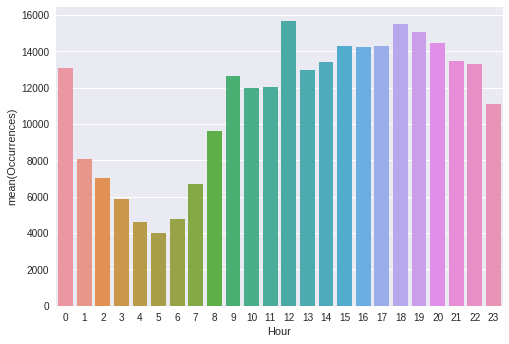

In [162]:
ax = sns.barplot(x = crimes_time['Hour'], y = crimes_time['Occurrences'])
plt.show(ax)

In [ ]:
geolocator = Nominatim()
location = geolocator.reverse("41.92449696, -87.64452163")
#print(location.raw)
print(location.raw)